In [3]:
#importing the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# check for the available data set in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
#describe the data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# finding the missing values in the datasets
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# filling the missing values as median in age, mode in embarked , and 'Unknown" in deck in deck
df['age'].fillna(df['age'].median())
df['embarked'].fillna(df['embarked'].mode()[0])
# showing deck is a categorical value so first change 'Unknown' to a categorical value
# Check if 'Unknown' is already a category
if "Unknown" not in df['deck'].cat.categories:
          df['deck'] = df['deck'].cat.add_categories(['Unknown'])  
# Step 2: Use df.loc[] to fill missing values safely
df.loc[df['deck'].isna(),'deck'] = 'Unknown'

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


In [10]:
# dropping redundent columns 
#there are adult_male,alive,alone,who are the redundent columns so i am going to drop these columns
df.drop(columns = ['adult_male','alive','class','who'],inplace = True)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


# Univeriate Data Analysis

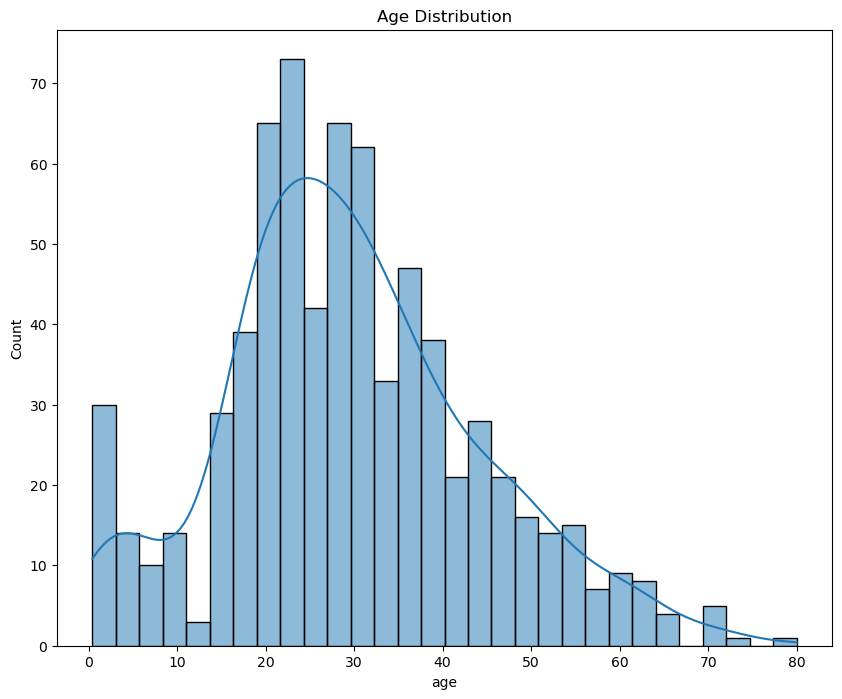

In [12]:
# Age Distribution
plt.figure(figsize=(10,8))
sns.histplot(df['age'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

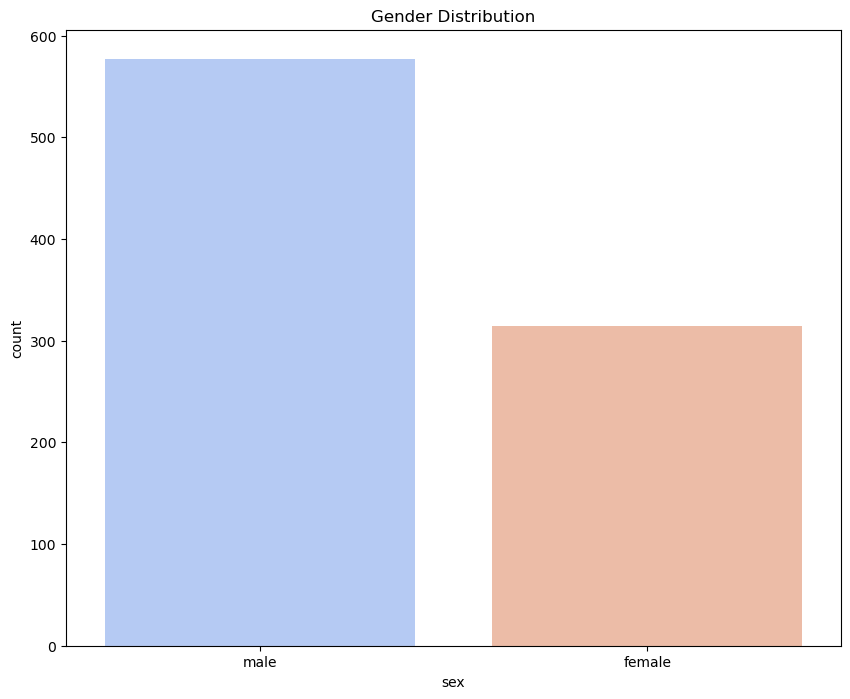

In [13]:
# Gender Distribution
plt.figure(figsize = (10,8))
sns.countplot(x = "sex", data = df, hue = "sex", palette = "coolwarm")
plt.title("Gender Distribution")
plt.show()

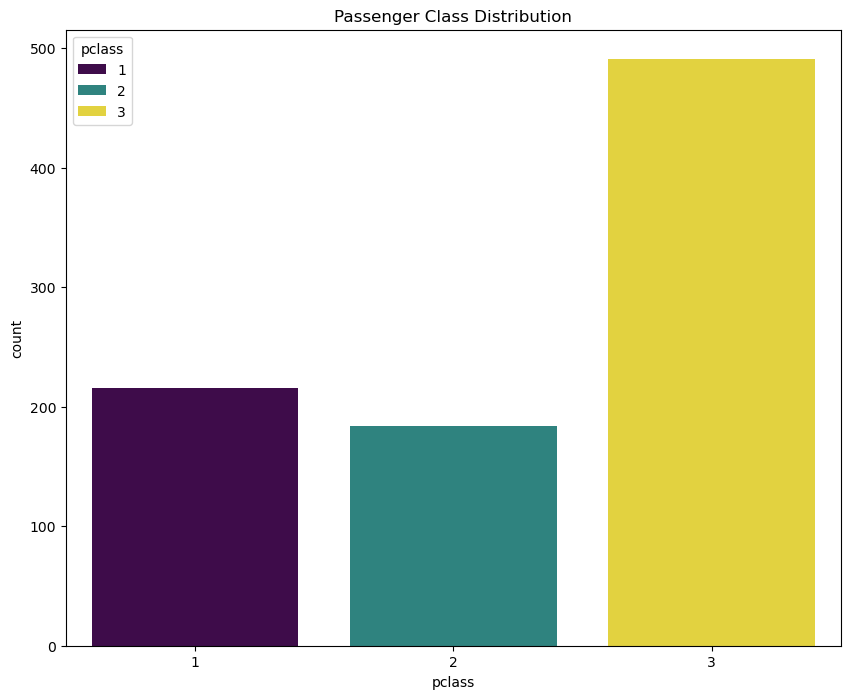

In [14]:
# Passenger class Distribution
plt.figure(figsize = (10,8))
sns.countplot(x = 'pclass', data = df, hue = 'pclass', palette = 'viridis')
plt.title("Passenger Class Distribution")
plt.show()

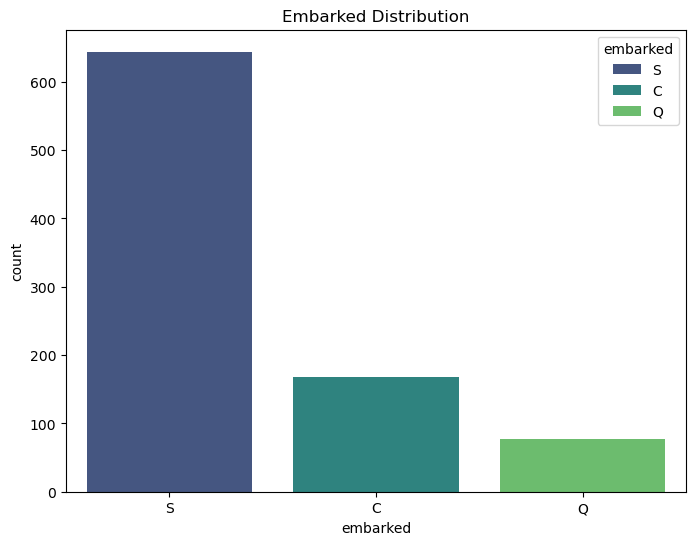

In [15]:
# embarck distribution
plt.figure(figsize=(8,6))
sns.countplot(x = "embarked", data = df, hue = "embarked", palette = "viridis")
plt.title("Embarked Distribution")
plt.show()

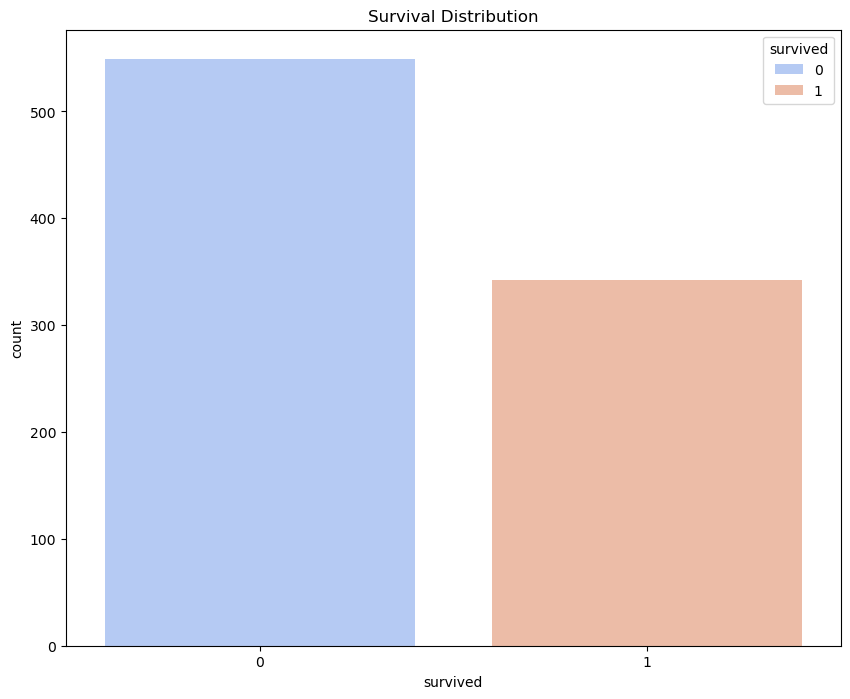

In [16]:
# Survival Distribution
plt.figure(figsize = (10,8))
sns.countplot(x = 'survived', data = df, hue = 'survived', palette = "coolwarm")
plt.title("Survival Distribution")
plt.show()

# Summary of Univariate Analysis

## Age Distribution Analysis

The distribution of the age variable shows how the ages of passengers are spread out. You can identify if most passengers were young or older and whether there are any outliers.

## Gender Distribution Analysis

A count plot for Gender will show the proportion of male vs female passengers.

## Passenger Class Distribution Analysis

A count plot for passenger class will show the total number of passengers in a different classes( how many were in first, how many in second and so on..).

## Embarked Distribution analysis

The count plot for embarked will give insight into where most passengers boarded.

## Survival Distribution Analysis

The count plot indicates how many passengers survived VS those who did not.

# Bivariate analysis

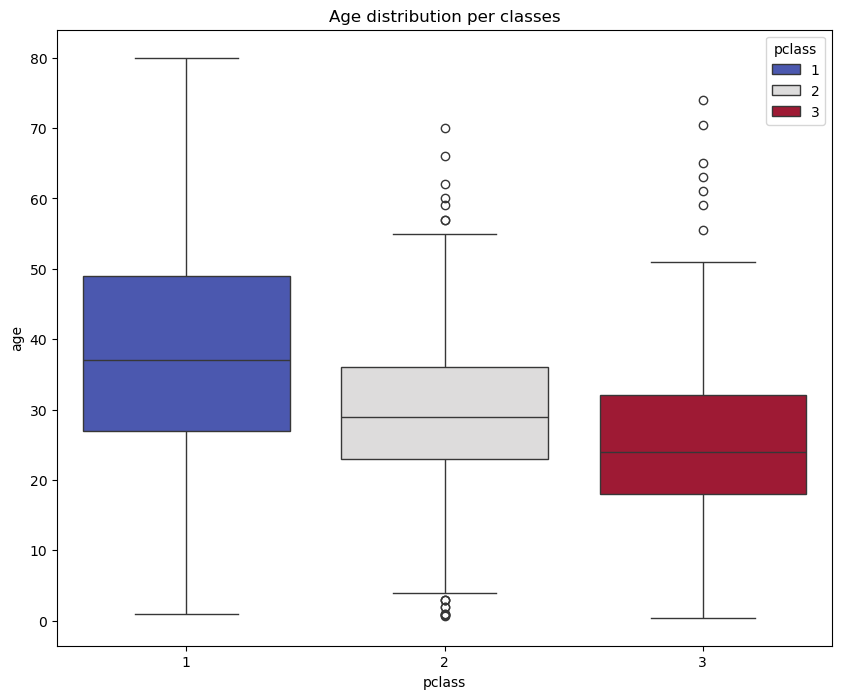

In [17]:
# age distribution per classes
plt.figure(figsize = (10,8))
sns.boxplot(x = 'pclass', y = 'age', data = df, hue = 'pclass', palette = "coolwarm")
plt.title("Age distribution per classes")
plt.show()

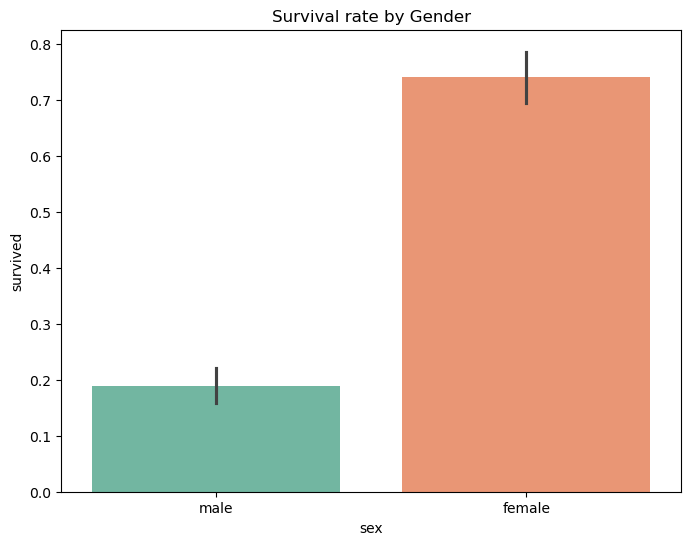

In [18]:
# distribution of Survival rate by gender
plt.figure(figsize = (8,6))
sns.barplot(x = "sex", y = "survived", data = df, hue = "sex", palette="Set2")
plt.title("Survival rate by Gender")
plt.show()

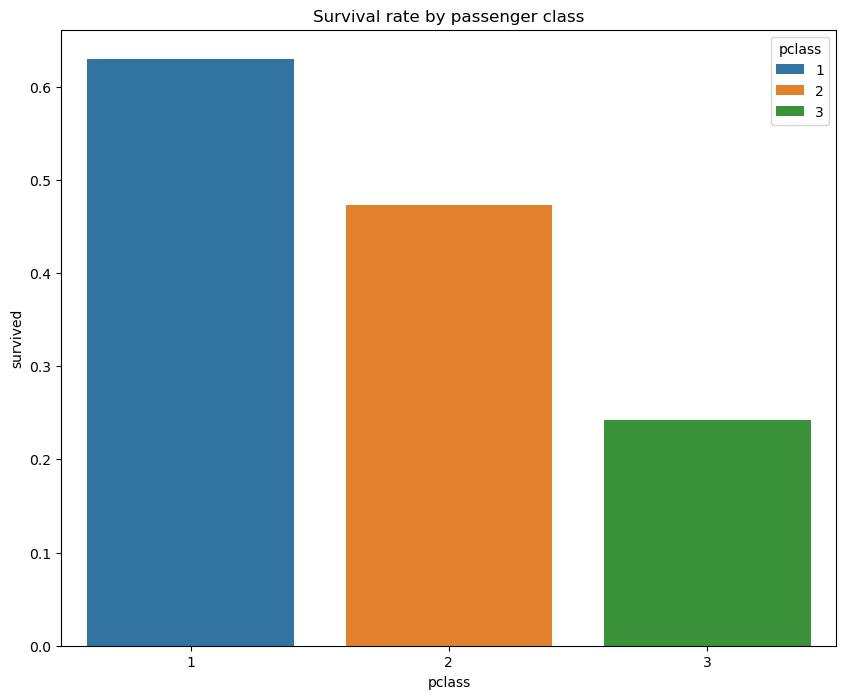

In [40]:
# Survival rate by pclass
plt.figure(figsize = (10,8))
sns.barplot(x = "pclass", y = "survived", data = df, hue = 'pclass', errorbar = None, palette = "tab10")
plt.title("Survival rate by passenger class")
plt.show()

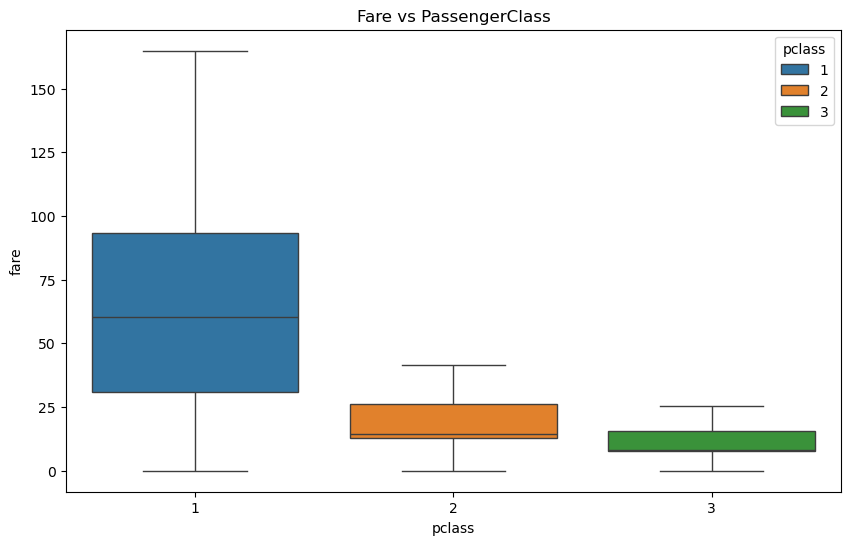

In [19]:
# fare VS passengerClass
plt.figure(figsize = (10,6))
sns.boxplot(x = "pclass", y = 'fare', data = df, hue = 'pclass', palette = 'tab10',showfliers = None) # showfliers = None helps to remove the outliers in boxplot
plt.title("Fare vs PassengerClass")
plt.show()

# Summary of bivariate analysis

### Age VS Passenger Classes

- the first class passengers tend to be older as compare to second and third class passengers.
- third class passengers are the most younger passengers.
- second class passengers have an intermediate distribution.

### Gender VS Survival Rate

- Famales had a significantly higher survival rate as compared to males.
- This aligns with the "women and children first" policy during evacuation.

### Survival rate by passenger class

- First class passengers had highest survival rate followed by second class , with third class passengers having the lowest survival rate.
- this means that the higher class passengers have better access of lifeboat or received higher priority during rescue.

### Fare VS Passenger Class

- First-class passengers had the highest fare variation, meaning some tickets were far more expensive than others.
- Third-class also shows variation, implying different pricing tiers within the same class.

# Multivariate Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
df2 = df[['survived','pclass','age','fare']]

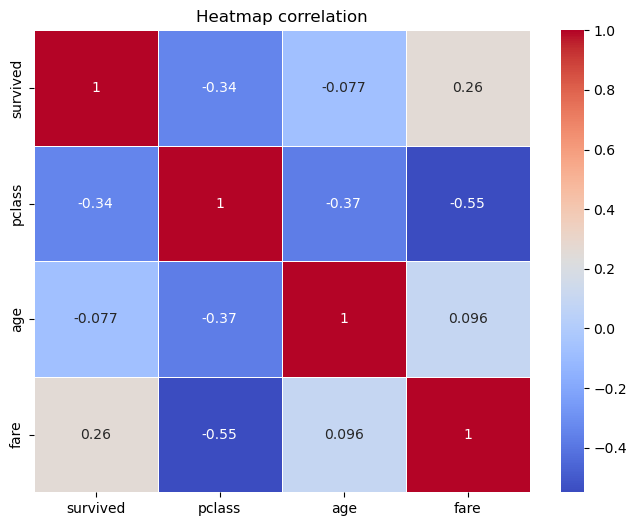

In [26]:
# Produce a HitMap
plt.figure(figsize = (8,6))
sns.heatmap(df2.corr(),annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("Heatmap correlation")
plt.show()

<Figure size 1000x800 with 0 Axes>

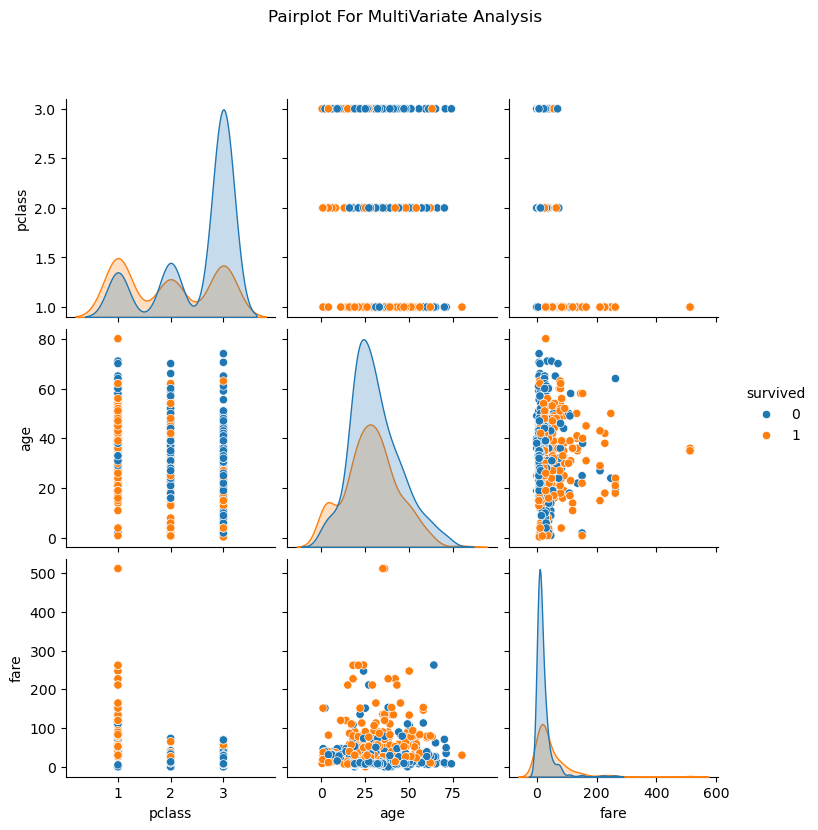

In [42]:
# pairplot
plt.figure(figsize = (10,8))
sns.pairplot(df2,hue = "survived")
plt.suptitle("Pairplot For MultiVariate Analysis", y = 1.1)
plt.show()

# Summary Analysis of MultiVariate Analysis


- Higher-class passengers (Pclass = 1) had better survival chances.
- Paying a higher fare increased the chance of survival.
- Age had little effect on survival, but younger people had slightly better chances.